# Logistic Regression Model for Predicting Rain in Cambodia

The dataset contains weather data for Cambodia from March 18, 2022, to March 18, 2024. Each row in the dataset represents a day's weather conditions with the following columns:

1. **name**: The location name, which is Cambodia for all rows.
2. **datetime**: The date of the weather data.
3. **tempmax**: The maximum temperature for the day (presumably in Celsius).
4. **tempmin**: The minimum temperature for the day (in Celsius).
5. **temp**: The average temperature for the day (in Celsius).
6. **feelslikemax**: The maximum "feels like" temperature for the day, accounting for humidity and wind (in Celsius).
7. **feelslikemin**: The minimum "feels like" temperature for the day (in Celsius).
8. **feelslike**: The average "feels like" temperature for the day (in Celsius).
9. **dew**: The dew point temperature, which indicates the absolute moisture in the air (in Celsius).
10. **humidity**: The average humidity for the day (percentage).
11. **precip**: The precipitation amount for the day (in millimeters).
12. **precipcover**: The percentage of the day with precipitation.
13. **preciptype**: The type(s) of precipitation (e.g., rain, snow).
14. **snow**: The snowfall amount for the day (in centimeters).
15. **snowdepth**: The depth of snow on the ground (in centimeters).
16. **windgust**: The maximum wind gust speed for the day (in kilometers per hour).
17. **windspeed**: The average wind speed for the day (in kilometers per hour).
18. **winddir**: The average wind direction in degrees (with 0 or 360 representing North).
19. **sealevelpressure**: The average sea-level pressure for the day (in millibars).
20. **cloudcover**: The average cloud cover for the day (percentage).
21. **visibility**: The average visibility for the day (in kilometers).
22. **solarradiation**: The average solar radiation for the day (in watts per square meter).
23. **solarenergy**: The total solar energy for the day (in kilowatt-hours per square meter).
24. **uvindex**: The maximum UV index for the day.
25. **severerisk**: A severity risk index (scale not specified, but could be related to severe weather events).
26. **sunrise**: The time of sunrise.
27. **sunset**: The time of sunset.
28. **moonphase**: The phase of the moon (a value between 0 and 1, with 0/new moon, 0.5/full moon).
29. **conditions**: General weather conditions for the day (e.g., Rain, Partially cloudy).
30. **description**: A description of the day's weather conditions.
31. **icon**: A symbol or icon representing the day's weather (e.g., rain).
32. **stations**: Weather station(s) that contributed data.


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
# Load the dataset
data = pd.read_csv('Cambodia 2022-03-18 to 2024-03-18.csv')

# Initial dataset overview
data.head()

In [17]:
data.info()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Cambodia,2022-03-18,35.0,26.0,29.0,41.9,26.0,33.0,23.8,74.6,...,14.4,7,30,2022-03-18T06:06:05,2022-03-18T18:11:20,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VDPP,48991099999,remote"
1,Cambodia,2022-03-19,36.0,25.0,29.6,41.9,25.0,32.5,23.0,69.6,...,22.1,8,30,2022-03-19T06:05:29,2022-03-19T18:11:21,0.53,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VDPP,48991099999"
2,Cambodia,2022-03-20,36.0,25.0,29.3,40.8,25.0,32.3,23.8,75.2,...,20.7,7,30,2022-03-20T06:04:52,2022-03-20T18:11:23,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VDPP,48991099999"
3,Cambodia,2022-03-21,33.0,25.0,28.0,39.2,25.0,31.5,24.4,82.3,...,15.4,7,10,2022-03-21T06:04:14,2022-03-21T18:11:25,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VDPP,48991099999,remote"
4,Cambodia,2022-03-22,34.0,25.0,27.4,39.3,25.0,29.3,24.6,86.3,...,15.3,6,10,2022-03-22T06:03:37,2022-03-22T18:11:26,0.64,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VDPP,48991099999"


## Exploratory Data Analysis (EDA)

In [ ]:
# # Transform 'preciptype' into a binary target variable
# data['rain'] = data['preciptype'].notnull().astype(int)
# Convert 'preciptype' into a binary variable: 1 for rain, 0 for no rain/missing
data['rain'] = data['preciptype'].apply(lambda x: 1 if x == 'rain' else 0)

# Selecting relevant features for the logistic regression model
features = ['humidity', 'cloudcover']
            # 'tempmin', 'feelslikemax','feelslikemin', 'feelslike','dew','temp','precip','windgust','windspeed', 'winddir','sealevelpressure','tempmax','visibility','solarradiation','solarenergy','uvindex']
target = 'rain'

# Focusing on the selected features
selected_data = data[features + [target]]

# Dropping less relevant features for logistic regression
columns_to_drop = ['name', 'datetime', 'preciptype', 'conditions', 'description', 'icon', 'stations', 'sunrise', 'sunset', 'snow', 'snowdepth', 'moonphase']
features_data = data.drop(columns=columns_to_drop)

# Display summary statistics to understand the data's distribution
selected_data.describe()

In [19]:
features_data.head()

,humidity,cloudcover,rain
count,732.000000,732.000000,732.000000
mean,74.755874,49.469809,0.668033
std,9.048899,14.077280,0.471241
min,48.900000,11.100000,0.000000
25%,68.575000,39.375000,0.000000
50%,75.100000,50.000000,1.000000
75%,81.625000,58.125000,1.000000
max,95.600000,88.800000,1.000000


In [20]:
# Saving the first 5 rows of features_data as a CSV file
features_data.to_csv('features_data_head.csv', index=False)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,rain
0,35.0,26.0,29.0,41.9,26.0,33.0,23.8,74.6,2.5,100,...,15.8,185.6,1006.3,49.9,10.0,165.0,14.4,7,30,1
1,36.0,25.0,29.6,41.9,25.0,32.5,23.0,69.6,1.0,100,...,22.3,152.8,1005.7,48.3,9.7,255.4,22.1,8,30,1
2,36.0,25.0,29.3,40.8,25.0,32.3,23.8,75.2,3.8,100,...,20.5,135.3,1006.8,66.2,9.1,240.0,20.7,7,30,1
3,33.0,25.0,28.0,39.2,25.0,31.5,24.4,82.3,4.0,100,...,20.5,156.0,1008.3,49.5,9.8,178.6,15.4,7,10,1
4,34.0,25.0,27.4,39.3,25.0,29.3,24.6,86.3,2.2,100,...,27.7,159.7,1009.1,58.9,9.0,178.5,15.3,6,10,1


In [ ]:
selected_data.head()

In [22]:
# Check for imbalance in the target variable
selected_data['rain'].value_counts(normalize=True)

,humidity,cloudcover,rain
0,74.6,49.9,1
1,69.6,48.3,1
2,75.2,66.2,1
3,82.3,49.5,1
4,86.3,58.9,1


## Feature Scaling and Data Splitting

In [ ]:
# Handling missing values if necessary
# In our case, we will assume there are no significant missing values after selection

# Splitting the dataset into training and testing sets
X = selected_data[features]
y = selected_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Extracting the two features for plotting
feature1 = X_train_scaled[:, 0]
feature2 = X_train_scaled[:, 1]

# Plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(feature1[y_train == 0], feature2[y_train == 0], color='red', label='Class 0')
plt.scatter(feature1[y_train == 1], feature2[y_train == 1], color='blue', label='Class 1')

## Logistic Regression Model Implementation

### Sigmoid Function
The sigmoid function, which maps any real-valued number into the range (0, 1), is defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


### Cost Function (Binary Cross-Entropy Loss)
The cost function used in logistic regression, aiming to measure the discrepancy between the predicted probabilities and the actual labels, is given by:
$$
J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.001, epochs=10000):
    # Adding intercept to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Initializing weights
    weights = np.zeros(X.shape[1])
    m = X.shape[0]
    costs = []
    
    for i in range(epochs):
        # Predicting
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        # Compute cost
        cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        
        if i % 100 == 0:
            costs.append(cost)
            print(f'Iteration {i}: Cost {cost}')
        
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= lr * gradient
    
    return weights, costs

# Train the logistic regression model
weights = logistic_regression(X_train_scaled, y_train)

## Model Evaluation

In [ ]:
def predict(X, weights):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return sigmoid(np.dot(X, weights)) >= 0.5

# Train the logistic regression model
weights, costs = logistic_regression(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = predict(X_test_scaled, weights)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Example weights array, replace this with your model's coefficients (excluding the intercept)
# For demonstration, let's assume the following are the coefficients for 4 features
# weights = np.array([0.5, -1.2, 2.5, -3.0, 1.5])  # Including intercept for demonstration

# Exclude the intercept for feature importance
feature_weights = weights[1:]  # Adjust based on your weights array structure

# Assuming you have the feature names stored in a list
feature_names = ['humidity', 'cloudcover']
                 # 'tempmin', 'feelslikemax','feelslikemin', 'feelslike','dew','temp','precip','windgust','windspeed', 'winddir','sealevelpressure','tempmax','visibility','solarradiation','solarenergy','uvindex'] # Adjust as per your dataset

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_weights)), feature_weights, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45)
plt.show()

Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.673926949680548
Iteration 200: Cost 0.6561523090207138
Iteration 300: Cost 0.6397053744197169
Iteration 400: Cost 0.6244749268541812
Iteration 500: Cost 0.6103570951960916
Iteration 600: Cost 0.597255670874355
Iteration 700: Cost 0.5850821350178795
Iteration 800: Cost 0.5737554732554837
Iteration 900: Cost 0.5632018433288646
Iteration 1000: Cost 0.5533541488573338
Iteration 1100: Cost 0.544151560868448
Iteration 1200: Cost 0.5355390181630058
Iteration 1300: Cost 0.5274667287039156
Iteration 1400: Cost 0.5198896871029736
Iteration 1500: Cost 0.5127672178011362
Iteration 1600: Cost 0.506062549465219
Iteration 1700: Cost 0.49974242319605044
Iteration 1800: Cost 0.4937767351110536
Iteration 1900: Cost 0.48813821251119205
Iteration 2000: Cost 0.4828021219898497
Iteration 2100: Cost 0.4777460073485893
Iteration 2200: Cost 0.47294945494395596
Iteration 2300: Cost 0.46839388401986265
Iteration 2400: Cost 0.46406235962266845
Iteration 2

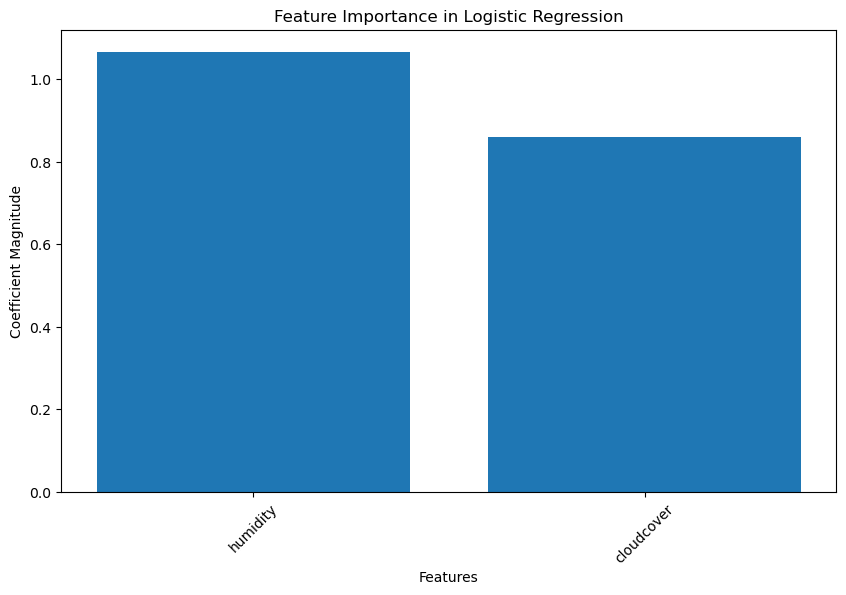

In [28]:
# weights = np.array([0.73426436, 0.78036223, 1.78908524])

# Extracting the two features for plotting
feature1 = X_train_scaled[:, 0]
feature2 = X_train_scaled[:, 1]

# Extracting weights (assuming the first element is the intercept)
theta_0 = weights[0]
theta_1 = weights[1]
theta_2 = weights[2]

# Plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(feature1[y_train == 0], feature2[y_train == 0], color='red', label='Class 0')
plt.scatter(feature1[y_train == 1], feature2[y_train == 1], color='blue', label='Class 1')


# Generate two points to define the line of the decision boundary
x_values = np.array([feature1.min(), feature1.max()])
y_values = -(theta_0 + theta_1 * x_values) / theta_2

# Plotting the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

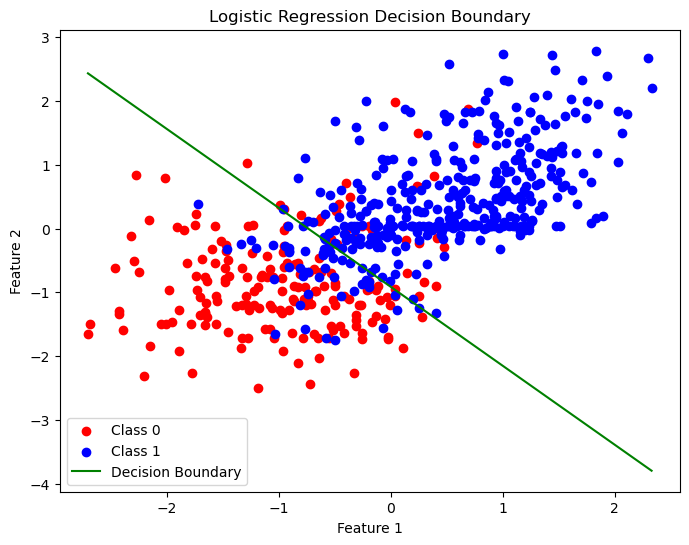

In [29]:
from joblib import dump

# Assuming 'weights' is the trained model weights and 'scaler' is the StandardScaler instance
dump(weights, 'logistic_regression_weights.joblib')
dump(scaler, 'scaler.joblib')